In [1]:
from hyperopt import Trials, space_eval
import torch

In [2]:
result = torch.load("search_result.pth")

In [3]:
result['best']

{'clipping_gradient': True,
 'observation_normalization': False,
 'orthogonal_initialization_and_layer_scaling': False,
 'policy_noclip': False,
 'reward_clipping': True,
 'reward_standardization': True,
 'value_clipping': False}

In [4]:
tr = result['trial'].trials
space = result['space']

In [5]:
tr[0]['result']['loss']

-134.57761419999972

In [6]:
tr[0]['misc']['vals']

{'clipping_gradient': [0],
 'observation_normalization': [1],
 'orthogonal_initialization_and_layer_scaling': [0],
 'policy_noclip': [1],
 'reward_clipping': [0],
 'reward_standardization': [1],
 'value_clipping': [0]}

In [7]:
d = {0: True, 1: False}

In [8]:
tmp = []
for i in range(len(tr)):
    row_tmp = {}
    row_tmp['score'] = -tr[i]['result']['loss']
    row_tmp['clipping_gradient'] = d[tr[i]['misc']['vals']['clipping_gradient'][0]]
    row_tmp['observation_normalization'] = d[tr[i]['misc']['vals']['observation_normalization'][0]]
    row_tmp['orthogonal_initialization_and_layer_scaling'] = d[tr[i]['misc']['vals']['orthogonal_initialization_and_layer_scaling'][0]]
    row_tmp['policy_noclip'] = d[tr[i]['misc']['vals']['policy_noclip'][0]]
    row_tmp['reward_clipping'] = d[tr[i]['misc']['vals']['reward_clipping'][0]]
    row_tmp['reward_standardization'] = d[tr[i]['misc']['vals']['reward_standardization'][0]]
    row_tmp['value_clipping'] = d[tr[i]['misc']['vals']['value_clipping'][0]]
    tmp.append(row_tmp)
    
    

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(tmp).sort_values(by='score', ascending=False)

In [11]:
df2 = df.drop_duplicates()

In [12]:
options = df2.columns[1:].tolist()

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [14]:
options

['clipping_gradient',
 'observation_normalization',
 'orthogonal_initialization_and_layer_scaling',
 'policy_noclip',
 'reward_clipping',
 'reward_standardization',
 'value_clipping']

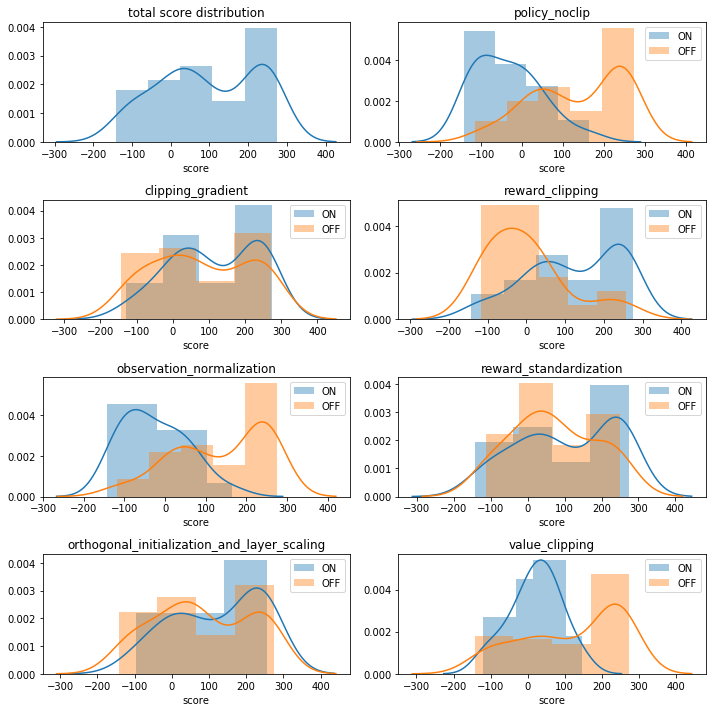

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10), facecolor='white')
for idx, opt in enumerate(options):
    if idx == 0:
        sns.distplot(df2.score, ax=ax[0][0])
        ax[0][0].set_title("total score distribution")
    
    row_n, col_n = (idx+1) % 4, (idx+1) // 4
    ax[row_n][col_n].set_title(opt)
    sns.distplot(df2[lambda x: x[opt] == True].score, label='ON', ax=ax[row_n][col_n])
    sns.distplot(df2[lambda x: x[opt] == False].score, label='OFF', ax=ax[row_n][col_n])
    ax[row_n][col_n].legend()
    
plt.tight_layout()
plt.show()

In [16]:
# option on vs. off
for opt in options:
    print(df2.groupby(opt).score.mean())
    print("\n")

clipping_gradient
False     80.246847
True     114.132718
Name: score, dtype: float64


observation_normalization
False    135.672125
True     -25.034419
Name: score, dtype: float64


orthogonal_initialization_and_layer_scaling
False     83.172379
True     122.924345
Name: score, dtype: float64


policy_noclip
False    136.639180
True     -34.792868
Name: score, dtype: float64


reward_clipping
False      0.870902
True     122.184475
Name: score, dtype: float64


reward_standardization
False     70.185904
True     106.342454
Name: score, dtype: float64


value_clipping
False    120.288015
True      21.117910
Name: score, dtype: float64




In [17]:
df3 = df2.groupby(df2.columns[1:].tolist())[['score']].mean().reset_index().sort_values('score', ascending=False)

In [18]:
# top 5 results
for i in range(5):
    print("-[{}]-".format(i+1))
    print(df3.iloc[i])
    print("\n")

-[1]-
clipping_gradient                                True
observation_normalization                       False
orthogonal_initialization_and_layer_scaling      True
policy_noclip                                   False
reward_clipping                                  True
reward_standardization                           True
value_clipping                                  False
score                                          246.65
Name: 28, dtype: object


-[2]-
clipping_gradient                                 True
observation_normalization                        False
orthogonal_initialization_and_layer_scaling      False
policy_noclip                                    False
reward_clipping                                  False
reward_standardization                            True
value_clipping                                   False
score                                          221.281
Name: 22, dtype: object


-[3]-
clipping_gradient                                False
obs

In [19]:
# bottom 5 results
for i in range(5):
    print("-[{}]-".format(i+1))
    print(df3.sort_values('score', ascending=True).iloc[i])
    print("\n")

-[1]-
clipping_gradient                                False
observation_normalization                        False
orthogonal_initialization_and_layer_scaling      False
policy_noclip                                     True
reward_clipping                                  False
reward_standardization                            True
value_clipping                                   False
score                                         -116.133
Name: 7, dtype: object


-[2]-
clipping_gradient                                False
observation_normalization                         True
orthogonal_initialization_and_layer_scaling      False
policy_noclip                                     True
reward_clipping                                  False
reward_standardization                           False
value_clipping                                    True
score                                         -109.876
Name: 16, dtype: object


-[3]-
clipping_gradient                               Fal

In [ ]:
import yaml

In [ ]:
with open("config/base.yaml") as file:
    base_config = yaml.full_load(file)

In [ ]:
# top 2
# bottom 2
# medium 2
# PPO_M
# PPO_Plus
# PPO_Plus_NOCLIP

In [ ]:
def generate_config(base, expermiment_recipe, config_name):
    copied_base = base.copy()
    copied_base['exp_name'] = config_name
    copied_base['experiment'].update(expermiment_recipe)
    
    file_path = "config/{}.yaml".format(config_name)
    with open(file_path, 'w') as file:
        yaml.dump(copied_base, file, default_flow_style=False)

In [ ]:
top1 = {k: bool(v) for k, v in df2.iloc[0].to_dict().items() if k in options}
top2 = {k: bool(v) for k, v in df2.iloc[1].to_dict().items() if k in options}
bot1 = {k: bool(v) for k, v in df2.iloc[-1].to_dict().items() if k in options}
bot2 = {k: bool(v) for k, v in df2.iloc[-2].to_dict().items() if k in options}
mid1 = {k: bool(v) for k, v in df2.iloc[int(len(df2) / 3)].to_dict().items() if k in options}
mid2 = {k: bool(v) for k, v in df2.iloc[int(len(df2) / 3 * 2)].to_dict().items() if k in options}

In [ ]:
top1

In [ ]:
# vanilla PPO
PPO_M = {'clipping_gradient': False,
         'observation_normalization': False,
         'orthogonal_initialization_and_layer_scaling': False,
         'reward_standardization': False,
         'reward_clipping': False,
         'value_clipping': False,
         'policy_noclip': False}

# PPO with all code-level optimization but policy_noclip
PPO_Plus = {'clipping_gradient': True,
         'observation_normalization': True,
         'orthogonal_initialization_and_layer_scaling': True,
         'reward_standardization': True,
         'reward_clipping': True,
         'value_clipping': True,
         'policy_noclip': False}

# PPO with all code-level optimization AND policy_noclip
PPO_Plus_NOCLIP = {'clipping_gradient': True,
         'observation_normalization': True,
         'orthogonal_initialization_and_layer_scaling': True,
         'reward_standardization': True,
         'reward_clipping': True,
         'value_clipping': True,
         'policy_noclip': True}

In [ ]:
generate_config(base_config, top1, "top1")
generate_config(base_config, top2, "top2")
generate_config(base_config, bot1, "bot1")
generate_config(base_config, bot2, "bot2")
generate_config(base_config, mid1, "mid1")
generate_config(base_config, mid2, "mid2")
generate_config(base_config, PPO_M, "PPO_M")
generate_config(base_config, PPO_Plus, "PPO_Plus")
generate_config(base_config, PPO_Plus_NOCLIP, "PPO_Plus_NOCLIP")

In [ ]:
# run all!!!!! fuck yeah!
import subprocess

In [ ]:
recipes = ['top1', 'top2', 'bot1', 'bot2', 'mid1', 'mid2', 'PPO_M', 'PPO_Plus', 'PPO_Plus_NOCLIP']

In [ ]:
# for recipe in recipes:
#     subprocess.call("python main.py --config {}.yaml".format(recipe), shell=True)